In [1]:
# !pip install opencv-python
# !pip install matplotlib
# !pip install tensorflow

In [2]:
import os
import random
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import numpy as np
from os import listdir
from os.path import isfile, join


In [3]:
import tensorflow as tf
import tensorflow.keras as keras
print(tf.__version__)

2023-08-06 00:15:35.539666: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-06 00:15:36.452197: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


2.13.0


In [4]:
!nvidia-smi

Sun Aug  6 00:15:37 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.54.06              Driver Version: 536.40       CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 3060 Ti     On  | 00000000:2B:00.0  On |                  N/A |
|  0%   51C    P8              25W / 225W |    726MiB /  8192MiB |      4%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [5]:
!pwd

/home/abirhasanmubin/biplab/ariake/pointcloud


# Kitti Dataset

kitti dataset 2012/2015 stereo images from camera

The KITTI dataset is widely used for autonomous driving research and includes various data modalities, including 3D point clouds captured using Velodyne LiDAR. The dataset includes road scenes and is labeled for tasks like object detection, tracking, and road segmentation.

Public dataset for KITTI Object Detection: https://github.com/DataWorkshop-Foundation/poznan-project02-car-model


Dataset link: https://www.kaggle.com/datasets/klemenko/kitti-dataset

In [6]:
SEED = 5000

def set_seed(SEED):
    np.random.seed(SEED)
    random.seed(SEED)
    tf.random.set_seed(SEED)
    
    return SEED
    
set_seed(SEED)

BASE_DIR = '/home/abirhasanmubin/biplab/ariake/pointcloud'
LABEL_PATH = os.path.join(BASE_DIR,'road_data/data_object_label')

IMAGE_PATH = os.path.join(BASE_DIR,'road_data/data_object_image')


IMAGE_WIDTH = 256
IMAGE_HEIGHT = 160

In [7]:
# Get the filenames of images and masks
images = sorted([f for f in listdir(IMAGE_PATH) if isfile(join(IMAGE_PATH, f))])
masks = sorted([f for f in listdir(LABEL_PATH) if isfile(join(LABEL_PATH, f))])


data = list(zip(images, masks))


df = pd.DataFrame(data, columns=['images', 'masks'])


df['images'] = df['images'].apply(lambda x: os.path.join(IMAGE_PATH, x))
df['masks'] = df['masks'].apply(lambda x: os.path.join(LABEL_PATH, x))


df['images'] = df['images'].apply(lambda x: os.path.basename(x))
df['masks'] = df['masks'].apply(lambda x: os.path.basename(x))


no_images = df[df['images'].apply(lambda i:  not os.path.exists(os.path.join(IMAGE_PATH, i)))]
if len(no_images) > 0:
    print("Some masks have no corresponding images")
    print(no_images)
else:
    print("All masks have their corresponding images")

img = img = cv2.imread(os.path.join(IMAGE_PATH, '1.png'))  
print('Image shape:', img.shape)


print(df.shape)
print(df.head())

All masks have their corresponding images
Image shape: (374, 1238, 3)
(3, 2)
  images  masks
0  1.png  1.txt
1  2.png  2.txt
2  3.png  3.txt


In [8]:
def get_labels(label_filename):
    
    data =  pd.read_csv(os.path.join(LABEL_PATH,label_filename), sep=" ", 
                       names=['label', 'truncated', 'occluded', 'alpha', 
                              'bbox_xmin', 'bbox_ymin', 'bbox_xmax', 
                              'bbox_ymax', 'dim_height', 'dim_width', 'dim_length', 
                              'loc_x', 'loc_y', 'loc_z', 'rotation_y', 'score'])
    
    return data
    
get_labels('1.txt')

,label,truncated,occluded,alpha,bbox_xmin,bbox_ymin,bbox_xmax,bbox_ymax,dim_height,dim_width,dim_length,loc_x,loc_y,loc_z,rotation_y,score
0,Car,0.89,0,2.29,0.00,194.70,414.71,373.00,1.57,1.67,4.14,-2.75,1.70,4.10,1.72,NaN
1,Pedestrian,0.00,1,0.71,1021.76,133.28,1101.39,316.63,1.81,1.06,0.73,4.75,1.33,7.59,1.25,NaN
2,Pedestrian,0.00,0,-1.58,672.23,171.73,690.13,224.33,1.73,0.84,0.86,2.46,1.41,24.14,-1.48,NaN
3,Pedestrian,0.00,0,-1.59,692.68,169.14,712.48,224.03,1.81,0.90,0.95,3.30,1.40,24.22,-1.46,NaN
4,Pedestrian,0.00,0,-1.46,537.84,168.08,560.90,224.34,1.78,0.92,1.01,-1.79,1.36,23.30,-1.54,NaN
5,DontCare,-1.00,-1,-10.00,916.14,175.59,973.32,253.55,-1.00,-1.00,-1.00,-1000.00,-1000.00,-1000.00,-10.00,NaN
6,DontCare,-1.00,-1,-10.00,628.80,173.19,653.95,196.66,-1.00,-1.00,-1.00,-1000.00,-1000.00,-1000.00,-10.00,NaN
7,DontCare,-1.00,-1,-10.00,610.47,175.76,625.72,205.87,-1.00,-1.00,-1.00,-1000.00,-1000.00,-1000.00,-10.00,NaN
8,DontCare,-1.00,-1,-10.00,766.54,168.32,841.38,261.86,-1.00,-1.00,-1.00,-1000.00,-1000.00,-1000.00,-10.00,NaN
9,DontCare,-1.00,-1,-10.00,464.22,177.67,508.93,230.69,-1.00,-1.00,-1.00,-1000.00,-1000.00,-1000.00,-10.00,NaN


In [9]:
def open_image(image_filename):
    return cv2.imread(os.path.join(IMAGE_PATH, image_filename))
    
    
def draw_box2d_id(id):
    """
       Bounding Boxes of images
    """
    return draw_box2d(open_image(id + '.png'),
                      get_labels(id + '.txt'))

LABEL_COLORS = {
    'Car': (255,0,0), 
    'Van': (255,255,0), 
    'Truck': (255,255,255),
    'Pedestrian': (0,255,255),
    'Person_sitting': (0,255,255), 
    
    'Cyclist': (0,128,255), 
    'Tram': (128,0,0),
    'Misc': (0,255,255),
    'DontCare': (255,255,0)
}

def draw_box2d(image, labels, ax = None):
    
    img = image.copy()
    for index, row in labels.iterrows():
        left_corner = (int(row.bbox_xmin), int(row.bbox_ymin))
        right_corner = (int(row.bbox_xmax), int(row.bbox_ymax))
        label_color = LABEL_COLORS.get(row.label,(0,255,0))
        
        img = cv2.rectangle(img, 
                            left_corner, right_corner, label_color, 1)
        img = cv2.putText(img, str(row.label), 
                          (left_corner[0] + 10, left_corner[1] - 4) , 
                          cv2.FONT_HERSHEY_SIMPLEX, 0.5, 
                          label_color, 1)
    if ax == None:
        plt.imshow(img)
    else:
        ax.imshow(img)

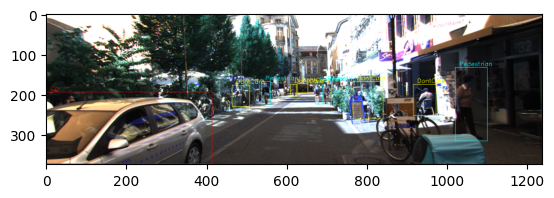

In [10]:
draw_box2d_id('1')

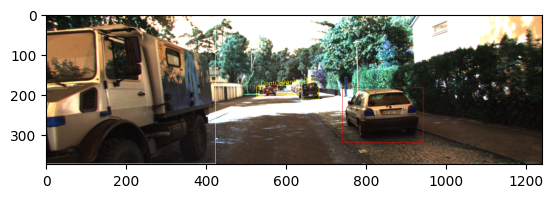

In [11]:
draw_box2d_id('2')

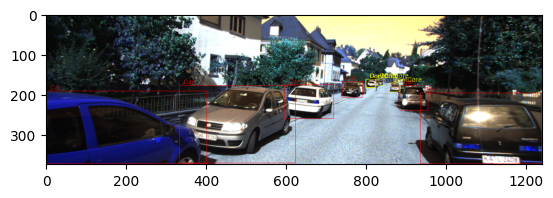

In [12]:
draw_box2d_id('3')